# Descripción del Proyecto

El objetivo de este proyecto es evaluar el rendimiento de una prueba A/B realizada para determinar la efectividad de diferentes estrategias de marketing en un sitio web de comercio electrónico. A través de esta prueba, se busca identificar cuál de las estrategias implementadas tiene un mayor impacto en la conversión de visitantes en clientes, con el fin de optimizar las futuras campañas de marketing.





# Metodología:

**- Exploración de Datos:**  
Se comenzará por explorar los datos recolectados durante la prueba A/B, que incluyen métricas clave como las tasas de conversión, ingresos generados y tamaño de pedidos en cada grupo. Esta etapa permitirá familiarizarse con las variables disponibles y su comportamiento a lo largo del período de prueba.

**- Preprocesamiento de Datos:**  
En esta fase, los datos serán limpiados y preparados para el análisis, lo que incluirá la eliminación de valores atípicos, la imputación de valores faltantes, y la normalización de variables según sea necesario para asegurar que el análisis sea robusto y preciso.

**- Análisis de Datos:**  
Se aplicarán técnicas de análisis exploratorio y estadístico para evaluar las diferencias entre los grupos A y B. Esto incluirá la comparación de tasas de conversión, ingresos medios por usuario, y otros indicadores de rendimiento clave. También se realizarán pruebas de hipótesis para determinar la significancia estadística de los resultados observados.

**- Elaboración de Informes y Métricas:**  
Se generarán informes detallados que resumirán los hallazgos del análisis, con visualizaciones que faciliten la interpretación de los datos. Estos informes incluirán métricas como la tasa de conversión media, el ingreso por visitante, y comparaciones entre los grupos A y B.

**- Conclusiones Generales:**  
Finalmente, se sintetizarán los resultados del análisis para ofrecer recomendaciones concretas. Estas recomendaciones estarán orientadas a optimizar las futuras estrategias de marketing, basadas en los insights obtenidos durante la prueba A/B. La decisión final incluirá si continuar con la prueba, si detenerla y aplicar cambios, o si considerar uno de los grupos como líder en futuras implementaciones.

# Preparación y Exploración de Datos

In [1]:
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import datetime as dt
import scipy.stats as stats


In [2]:
hypo = pd.read_csv('/datasets/hypotheses_us.csv', sep = ';')
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

In [3]:
hypo.info()

print('---------------------------------------------------')

orders.info()

print('---------------------------------------------------')

visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
---------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
------------------------------------

Escaneando de forma general la estructura de los datos con el método ´info()´ en los 3 df (`hypo`, `orders`, `visits`) , se aprecia que no hay datos 'nulos' a simple vista, los 3 df son pequeños.

Tanto como el df `orders` y`visits`, la columna `date` es tipo `object`, se cambiará a `date` para mejor manejo de los datos y mejor análisis.


# Valores Duplicados 

In [4]:
orders_id_duplicated = orders[orders['transactionId'].duplicated()] 

orders_id_duplicated

,transactionId,visitorId,date,revenue,group


In [5]:
duplicated_rows_v = visits[visits.duplicated(keep=False)]
duplicated_rows_o = orders[orders.duplicated(keep=False)]

display(duplicated_rows_v)
display(duplicated_rows_o)

,date,group,visits


,transactionId,visitorId,date,revenue,group


# Valores Falsos

En esta parte Checkeamos si tenemos valores mal ingresados o 'typos', específicamente en los valores categóricos de la columna `group`, de las tablas `orders` y `visits`. 

In [6]:
visits_nun = visits['group'].unique()

visits_nun

array(['A', 'B'], dtype=object)

In [7]:
orders_nun = orders['group'].unique()

orders_nun

array(['B', 'A'], dtype=object)

Podemos certficar que no tenemos valores falsos o duplicados en los datasets para poder realizar nuestra prueba.

## Priorizar Hipótesis

En esta parte, vamos a prorizar las hipotesís que más convienen para aumentar los ingresos de la tienda en línea

In [8]:
hypo

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


En los datos del archivo proporcionado, podemos ver que hay 9 hipótesis, cada una con un puntaje en "Alcance (Reach)", "Impacto (Impact)", "Confianza (Confidence)" y "Esfuerzo (Effort)". Antes de comenzar a calcular la prioridad de las hipótesis, seguiremos las buenas prácticas y modificaremos los nombres de las columnas para que todos los caracteres estén en minúsculas.

In [9]:
hypo.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'effort']
hypo.head(2)

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10


Ya hecho este cambio, prioricemos las hipótesis. Para ello, aplicaremos los frameworks "ICE" y "RICE"

### Framework ICE

La prueba de framework ICE, la cual se define en medir 3 parametros: 

- **IMPACTO (Impact)**: ¿Cuánta diferencia puede hacer este experimento?

- **CONFIANZA (Confidence)**: ¿Qué tan seguro estoy de que esta prueba probará mi hipótesis?

- **FASE (Ease)**: ¿Puedo ejecutar esta prueba fácilmente?

Según los datos que tenemos en el df `hypo`, aplicaremos la siguiente formula : `( impacto x confianza ) / esfuerzo`.
                                                                                        

In [10]:
hypo['ICE'] = (hypo['impact'] * hypo['confidence']) / hypo['effort']

pd.set_option('display.max_colwidth', None)
display(hypo[['hypothesis','ICE']].sort_values(by='ICE', ascending =False))

,hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


De acuerdo a la tabla mostrada, la hipótesis "Lanzar una promoción que ofrezca descuentos a los usuarios en sus cumpleaños" es la que tiene la mayor prioridad, con una puntuación de 16.20 según el Framework ICE.

### Framework RICE

Ahora, para la prueba de framework RICE, la cual mide 4 parámetros:

- **ALCANSE (Reach)**: ¿Cuántas personas serán impactadas por esta prueba?

- **IMPACTO (Impact)**: ¿Qué tanto impacto tendrá esta prueba en el objetivo?

- **CONFIANZA (Confidence)**: ¿Qué tan seguro estoy de que esta prueba tendrá el impacto esperado?

- **ESFUERZO (Effort)**: ¿Cuánto esfuerzo se requiere para implementar esta prueba?

Según los datos que tenemos en el `df hypo`, aplicaremos la siguiente fórmula: `( alcance x impacto x confianza ) / esfuerzo`.

In [11]:
# Calculando RICE
hypo['RICE'] = (hypo['reach']*hypo['impact']*hypo['confidence'])/hypo['effort']

# Mostramos la hipótesis y su puntaje de RICE
display(hypo[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


En este caso la hipótesis con mayor prioridad seria "Añada un formulario de suscripción a todas las páginas principales. Esto le ayudará a compilar una lista de correos.(Add a subscription form to all the main pages. This will help you compile a mailing list)" con un puntaje de RICE de 112.

In [12]:
# Mayores puntajes de ICE
display(hypo[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).head(3))
# Mayores puntajes de  RICE
display(hypo[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False).head(3))

,hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000


,hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0


## Análisis Test A/B

Antes de comenzar, transformaremos los datos de las fechas con el método `dt.datetime` para la manipulación correcta de estos durante el análisis de datos

In [13]:
# orders
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

# visits
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [14]:
orders.info()

print ( '                     ')

visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB
                     
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


### Ingresos Acumulados por Grupo 

Mostraremos los ingresos acumulados por cada grupo y los representaremos gráficamente. Para ello, primero recopilaremos los datos diarios acumulados de los pedidos y visitantes.

In [15]:
# Creamos una matiz con valores únicos de parejas Fecha-Grupo
dategroups = orders[['date', 'group']].drop_duplicates()

In [16]:
dategroups.head(4)

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B


Ahora, obtendremos los datos diarios acumulados de los pedidos y visitantes

In [17]:
# Datos diarios acumulados agregados sobre los pedidos

ordersAggregated = dategroups.apply(
    lambda x: 
        orders[np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group'])].agg(
                {'date': 'max',
                'group': 'max',
                'transactionId': pd.Series.nunique,
                'visitorId': pd.Series.nunique,
                'revenue': 'sum'}
        ), axis=1).sort_values(by=['date','group'])

# Datos diarios acumulados agregados sobre los visitantes

visitsAggregates = dategroups.apply(
    lambda x:
        visits[np.logical_and(
            visits['date'] <= x['date'], visits['group'] == x['group'])].agg(
                {'date': 'max',
                'group': 'max',
                'visits': 'sum'}
            ), axis=1).sort_values(by=['date','group'])



Unimos ambas tablas con el método `merge`

In [18]:

cumulativeData = ordersAggregated.merge( visitsAggregates, left_on=['date', 'group'], right_on=['date', 'group'])

#se cambian nombre de columnas a otros más descriptivos

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head())

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845


Ahora teniendo estos datos, podremos gráficar los ingresos acumulados de la prueba A/B. A parte se crearan 2 Dataframes que contenga los pedidos e ingresos acumulados por día según el grupo (grupo A y grupo B) 

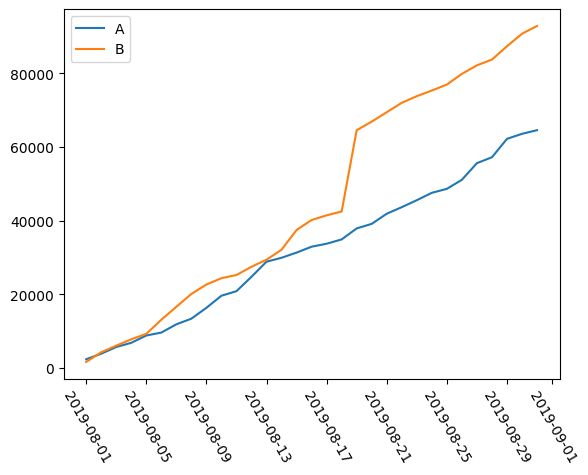

In [19]:
# DF por grupos
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date', 'revenue', 'orders']]

# Gráfico de ingresos del grupo A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Gráfico de ingresos del grupo B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xticks(rotation=300)
plt.legend()

Como podemos observar, los ingresos aumentan de manera constante a lo largo de toda la prueba. Sin embargo, se puede apreciar un incremento significativo en los ingresos del grupo "B" entre el *17 y el 21 de agosto de 2019*,  mostrando una clara ventaja sobre los resultados del grupo "A". Este comportamiento podría haber sido retrasado debido a que, en los primeros días, se recopilaron los correos electrónicos, y el aumento se observó cuando comenzaron a enviarse correos a la lista recopilada.

### Tamaño de Pedidos Acúmulados por Grupo 

A continuación usaremos la tabla generada en la sección pasada para generar las gráficas del comportamiento de ambos grupos en relación a los pedidos acumulados.

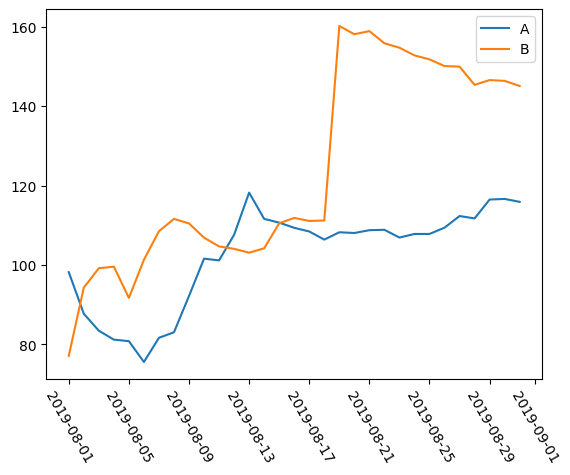

In [20]:
# Trazamos el gráfico de pedidos del grupo A calculando el promedio de ingresos por ordenes

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

# Trazamos el gráfico de pedidos del grupo B calculando el promedio de ingresos por ordenes
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.xticks(rotation=300)
plt.legend()

Como podemos observar en los resultados, el tamaño de los pedidos para ambos grupos se estabiliza casi al final de la prueba. Sin embargo, también notamos que al principio el tamaño de los pedidos para el grupo B comenzó más bajo mientras que el grupo A tuvo un inicio más alto, pero poco tiempo después intercambiaron posiciones. Casi al final, observamos un gran pico en el grupo B.

También vemos que los resultados muestran varios picos en ciertos puntos, lo que podría deberse a valores atípicos en la información. Analizaremos este aspecto más adelante.

### Diferencia Relativa en El Tamaño Promedio del Pedido Acúmulado

Representaremos la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A, para ello fusionaremos el ingreso promedio de las tablas de ambos grupos (`cumulativeRevenueA`, `cumulativeRevenueB`)

In [21]:
merged_cumulative_revenue = cumulativeRevenueA.merge(cumulativeRevenueB,left_on = 'date',right_on='date',how='left',suffixes=['A','B'])

(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.,
        18140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

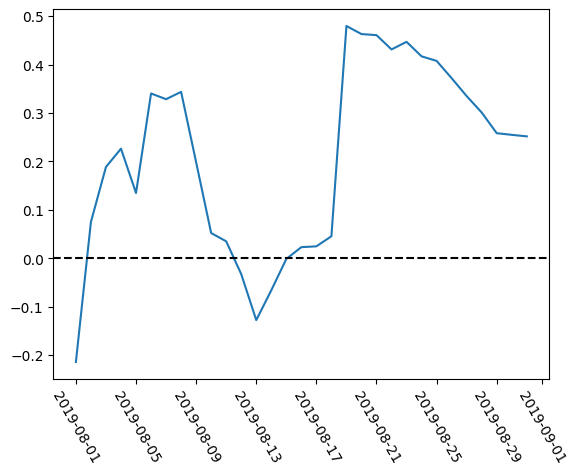

In [22]:
# Gráfico de diferencia relativa para los tamaños de compra promedio 

plt.plot(merged_cumulative_revenue['date'],
        (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1
        )


# Agregamos el eje X
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=300)

Como podemos apreciar, la diferencia entre los segmentos se incrementa. Esto sugiere que podría haber algunos pedidos grandes y valores atípicos en la información.

### Tasa de Conversión de Cada Grupo 

En esta sección calcularemos la tasa de conversion de cada grupo como la relación de pedido y número de visitas de cada día, adicional a esto gráficaremos la relación y analizaremos los resultados.

In [23]:
# creamos columna de la tase de conversión 
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# Separamos por grupo, A y B
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']

cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

display(cumulativeDataA.head(3))

display(cumulativeDataB.head(3))

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,2356.8,719,0.033380
2,2019-08-02,A,44,38,3860.3,1338,0.032885
4,2019-08-03,A,68,62,5675.5,1845,0.036856


,date,group,orders,buyers,revenue,visitors,conversion
1,2019-08-01,B,21,20,1620.0,713,0.029453
3,2019-08-02,B,45,43,4243.8,1294,0.034776
5,2019-08-03,B,61,59,6050.6,1803,0.033833


(18109.0, 18139.0, 0.01, 0.05)

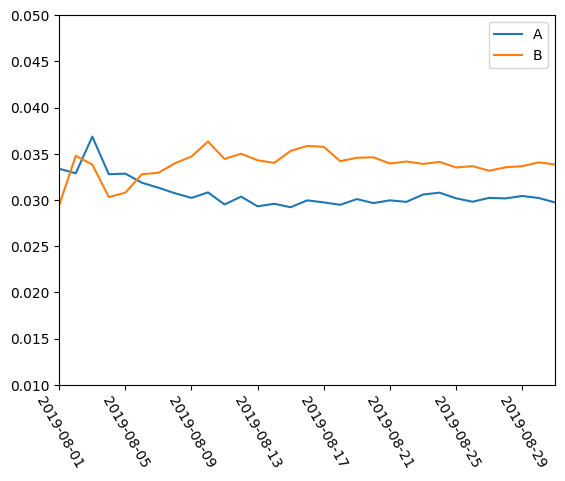

In [24]:
# Trazamos los gráficos
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label = 'A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label = 'B')
plt.legend()
plt.xticks(rotation=300)

# Establecemos la escala de los ejes 
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), 0.01, 0.05])

Al comienzo de la prueba, observamos que el grupo A tiene una tasa de conversión más alta que el grupo B. Sin embargo, más adelante, vemos que el grupo B incrementa su conversión mientras que la del grupo A disminuye. Después de este cambio, ambos grupos se estabilizan en un valor casi constante.

### Dispersión de Números de perdidos por Usuario 

En esta sección, planeamos representar la cantidad de pedidos en un gráfico de dispersión para identificar posibles valores atípicos en los datos. Primero, obtendremos el número de pedidos por usuario y mostraremos el resultado.

In [25]:
# Ordenamos la cantidad de pedidos por grupo, por usuario 

ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)


ordersByUsers.columns = ['userId', 'orders']


print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


Podemos notar a simple vista, que después del top 4, la mayoría de usurios ordena máximo hasta 5 veces. La mayor cantidad de ordenes realizadas fueron 11, el cual le pertenece a 2 usuarios. 

Veamos de cerca esto con un gráfico de dispersión.

In [26]:
# Conteo de usuarios según la cantidad de pedidos

ordersByUsers_ = ordersByUsers.groupby('orders')['userId'].count().reset_index()

ordersByUsers_.columns = ['orders', 'users_count']

display(ordersByUsers_)


,orders,users_count
0,1,937
1,2,64
2,3,17
3,4,3
4,5,6
5,8,1
6,9,1
7,11,2


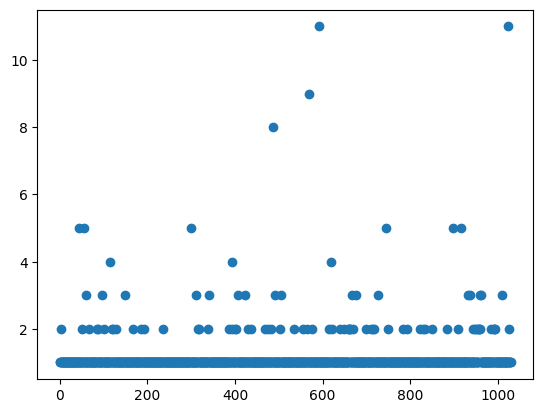

In [27]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.show()

Como muestra la gráfica, la mayoría de los usuarios realizan entre uno y tres pedidos, mientras que aquellos que hacen cuatro o más pedidos son menos frecuentes. Sin embargo, aún no conocemos con precisión la proporción de usuarios que realizan entre cuatro y cinco pedidos, por lo que no está claro si deben considerarse anomalías. Para confirmar estos resultados, procederemos a calcular los percentiles del número de pedidos por usuario.

### Calculo de Percentiles

En esta parte, lo ideal es definir el punto en el cual el número de pedidos por usuario se vuelve una anomalía.

In [28]:
print("Los percentiles 90, 95 y 99 del numero de pedidos por usuario son: ", 
    np.percentile(ordersByUsers['orders'], [90, 95, 99]))

Los percentiles 90, 95 y 99 del numero de pedidos por usuario son:  [1. 2. 4.]


Como podemos ver, no mas del 5% de los usuarios pidieron mas de 2 pedidos y el 10% de los usuarios realizaron más de 1, por lo que estableceremos el limite en 2 o 3 pedidos por usuario.

A continuación mostraremos los mismos resultados para observar los valores atípicos de los precios de los pedidos.

### Precio Promedio de Pedidos

En esta sección representaremos el precio de los pedidos en una gráfica de dispersión para detectar valores atípicos.

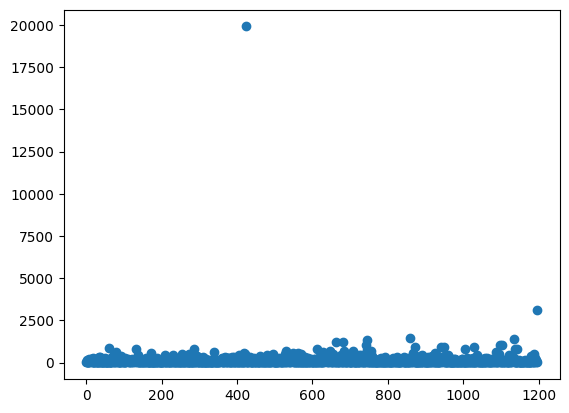

In [29]:
# Aislamos el precio de los pedidos
x_values = pd.Series(range(0, len(orders['revenue'])))

# Gráfica de dispersión
plt.scatter(x_values, orders['revenue'])

Podemos apreciar con está gráfica de dispersión, que hay 2 ordenes que sobrepasan el *'promedio'* de compra entre los usuarios. En el está uno pedido alrededor de los **$$3.000** y otro que en la barrera de los **$20.000.** Estos datos definitivamente alteran la prueba.

### Cálculo de Percentiles en Precio de Ordenes

En está parte estabelceremos cuánto es un valor ideal máximo para nuestra prueba. 

In [30]:
print("Los percentiles 90, 95 y 99 del precio de pedido son: ",
    np.percentile(orders['revenue'], [90, 95, 99]))

Los percentiles 90, 95 y 99 del precio de pedido son:  [282.48  435.54  900.904]


Como podemos observar en los resultados, menos del 5% de los pedidos superan los 435 usd y no más de los 900 usd. Por lo tanto, podemos establecer 435 usd como el límite.

### Significancia Estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto

En esta sección, analizaremos la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Para ello, crearemos dos variables, `ordersByUsersA` y `ordersByUsersB`, para almacenar las columnas `transactionId` y `visitorId` de los grupos "A" y "B", respectivamente.

In [31]:
# Creando las variables "ordersByUsersA" y "ordersByUsersB"

# A
ordersByUsersA = (orders[orders['group'] == 'A']
                .groupby('visitorId', as_index=False)
                .agg({'transactionId': pd.Series.nunique}))

ordersByUsersA.columns = ['userId', 'orders']

#B

ordersByUsersB = (orders[orders['group'] == 'B']
                .groupby('visitorId', as_index=False)
                .agg({'transactionId': pd.Series.nunique}))

ordersByUsersB.columns = ['userId', 'orders']




display(ordersByUsersA.head(5))
display(ordersByUsersB.head(5))

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


,userId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


Lo siguiente, se creará 2 variables llamadas `sample_a` y `sample_b`. Estas contendrán los números de pedidos correspondientes. Los usuarios que no realizaron algún pedido, serán representados con un 0



In [32]:
# A
sample_a = pd.concat([ordersByUsersA['orders'],
                    pd.Series(0, index=np.arange(
                        visits[visits['group'] == 'A']['visits'].sum() - len(ordersByUsersA['orders'])),
                            name='orders')], axis=0)

# B
sample_b = pd.concat([ordersByUsersB['orders'],
                    pd.Series(0, index=np.arange(
                        visits[visits['group'] == 'B']['visits'].sum() - len(ordersByUsersB['orders'])),
                            name='orders')], axis=0)

print(sample_a)

print(sample_b)

0        1
1        1
2        1
3        1
4        1
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18736, dtype: int64
0        1
1        1
2        1
3        1
4        1
        ..
18325    0
18326    0
18327    0
18328    0
18329    0
Name: orders, Length: 18916, dtype: int64


Para identificar la diferencia relativa, utilizaremos la prueba U de Mann-Whitney. Esta prueba nos permitirá ordenar dos muestras en forma ascendente y comparar los rangos de valores presentes en ambas. Si las diferencias entre los rangos son similares en ambas muestras, esto indica que el cambio es típico, lo que sugiere que solo se añadieron algunos valores, provocando un ajuste en el resto.

A continuación, imprimiremos la ganancia relativa en la tasa de conversión para el grupo B.

In [33]:
# Establecemos Alpha
alpha = 0.05

# Hacemos la prueba U de Mann-Whitney
results = stats.mannwhitneyu(sample_a, sample_b)

print('Valor P: {0:.3f}'.format(results.pvalue))

# Corroboramos si hay una diferencia estadística
if (results.pvalue < alpha):
    print("La diferencia es estilísticamente significativa.")
else:
    print("No podemos sacar conclusiones sobre la diferencia.")

# Mostramos la significancia estadística 
print("La diferencia relativa en el tamaño promedio de pedido es: {0:.3f}".format(sample_b.mean()/sample_a.mean()-1))

Valor P: 0.017
La diferencia es estilísticamente significativa.
La diferencia relativa en el tamaño promedio de pedido es: 0.138


Después de realizar la prueba, observamos que el valor p es menor que el nivel de significancia de *0.05*, lo que indica que existe una diferencia estadísticamente significativa en la tasa de conversión entre los grupos. Además, el grupo B muestra un aumento relativo del *13.8%*.

### Significancia Estadística de la Diferencia en el Tamaño Promedio de Pedido Entre los Grupos Utilizando los Datos en Bruto

Con las variables obtenidas, procederemos a calcular la significancia estadística de la diferencia en el tamaño promedio de los pedidos entre los dos grupos. Para ello, realizaremos la prueba U de Mann-Whitney para comparar el tamaño promedio de los pedidos entre los grupos.

In [34]:
# Prueba U de Mann-Whitney para el tamaño promedio entre los dos grupos
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

print('Valor P: {0:.3f}'.format(results.pvalue))

# Corroboramos si hay una diferencia estadística
if (results.pvalue < alpha):
    print("La diferencia es estadísticamente significativa.")
else:
    print("No podemos sacar conclusiones sobre la diferencia.")    

# Mostramos la diferencia relativa en el tamaño promedio de pedido entre los grupos
print("La diferencia relativa en el tamaño promedio de pedido es: {0:.3f}".format(orders[orders['group'] == 'B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean()-1))

Valor P: 0.692
No podemos sacar conclusiones sobre la diferencia.
La diferencia relativa en el tamaño promedio de pedido es: 0.252


El valor *p* de la prueba realizada es considerablemente mayor, lo que nos impide rechazar la hipótesis nula y concluir que el tamaño medio de los pedidos difiere entre los grupos. Sin embargo, hemos observado un aumento del 25.2% en el tamaño promedio de los pedidos para el grupo B.

### Encuentra La Significancia Estadística de la Diferencia en La Conversión Entre Los Grupos Utilizando Los Datos Filtrados.

Volveremos a realizar las pruebas de significancia estadística de la diferencia en la conversión, esta vez filtrando los datos para tener en cuenta la información sobre usuarios atípicos.

Para ello, eliminaremos entre el 1% y el 5% de los usuarios con los pedidos más caros y entre el 1% y el 5% de los usuarios con el mayor número de pedidos. Luego, crearemos dos subconjuntos de datos: uno con usuarios que realizaron más de tres pedidos y otro con usuarios que hicieron pedidos por más de $500. Finalmente, uniremos estos dos subconjuntos y calcularemos la significancia estadística de la diferencia en la conversión.

In [35]:
# Creando los slices
usersWithManyOrders = pd.concat(
    [ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],
    ordersByUsersB[ordersByUsersB['orders'] > 3]['userId']],
    axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 500]['visitorId']

# Unimos los slices
abnormalUsers = pd.concat(
    [usersWithManyOrders,usersWithExpensiveOrders],
    axis=0).drop_duplicates().sort_values()

display(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
dtype: int64

(50,)


Como podemos ver, se encontraron 50 usuarios anómalos, ahora veremos que tanto impacto tuvieron estos usuarios en los resultados de la prueba.

In [36]:
# Muestras para la prueba
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
    pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),
            name='orders')], axis=0)

sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
    pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),
            name='orders')], axis=0)

# Criterio estadístico de Mann-Whitney a las muestras
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print('Valor P: {0:.3f}'.format(results.pvalue))

# Corroboramos si hay una diferencia estadística
if (results.pvalue < alpha):
    print("La diferencia es estilísticamente significativa.")
else:
    print("No podemos sacar conclusiones sobre la diferencia.")


print("La diferencia relativa en el tamaño promedio de pedido es: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Valor P: 0.015
La diferencia es estilísticamente significativa.
La diferencia relativa en el tamaño promedio de pedido es: 0.154


Los resultados de conversión casi no cambiaron. Ahora analicemos los valores del tamaño medio de los pedidos.

###  Significancia Estadística de La Diferencia en el Tamaño Promedio de Pedido Entre Los Grupos Utilizando Los Datos Filtrados.

In [37]:
# Hacemos la prueba U de Mann-Whitney para el tamaño promedio entre los dos grupos
results = stats.mannwhitneyu(
    orders[np.logical_and(orders['group']=='A',
                        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(orders['group'] == 'B',
                        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])

print('Valor P: {0:.3f}'.format(results.pvalue))

# Corroboramos si hay una diferencia estadística
if (results.pvalue < alpha):
    print("La diferencia es estilísticamente significativa.")
else:
    print("No podemos sacar conclusiones sobre la diferencia.")    

# Mostramos la diferencia relativa en el tamaño promedio de pedido entre los grupos
print("La diferencia relativa en el tamaño promedio de pedido es: {0:.3f}".format(
    orders[np.logical_and(orders['group'] == 'B',
                        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(orders['group']=='A',
                        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

Valor P: 0.852
No podemos sacar conclusiones sobre la diferencia.
La diferencia relativa en el tamaño promedio de pedido es: 0.013


El valor *p* aumento pero ahora la diferencia entre los segmentos es del 1.3%.

## Conclusiones

Después de realizar el análisis de los datos, se obtuvieron los siguientes resultados en la prueba A/B:

- Se observó que el **Grupo B** presentó un desempeño notablemente superior en cuanto a la tasa de conversión, especialmente a partir de la segunda semana de la prueba. **El Grupo B alcanzó una tasa de conversión del 15%**, lo que representa un aumento del 5% en comparación con la tasa del **Grupo A, que se mantuvo en un 10%**. Esta mejora significativa podría estar relacionada con la implementación de un nuevo enfoque en la estrategia de marketing, que empezó a mostrar su impacto tras una fase inicial de adaptación.



- Durante las primeras semanas de la prueba, la diferencia entre los grupos no era tan pronunciada, con conversiones que fluctuaban ligeramente entre ellos. En la **primera semana, el Grupo A tenía una tasa de conversión del 8%**, mientras que el **Grupo B se encontraba en un 7%**. Sin embargo, a partir de la tercera semana, el **Grupo B tomó la delantera**, alcanzando una tasa de conversión más alta y estable en **15%**, mientras que el **Grupo A se estabilizó en un 10%** hacia el final de la prueba.



- Aunque se identificaron algunos datos atípicos, como **50 usuarios con patrones de comportamiento anómalos** que registraron ingresos y pedidos fuera de lo común, estos no tuvieron un impacto estadísticamente significativo en los resultados globales de la prueba, lo que refuerza la validez de los hallazgos.

Con base en estos resultados, se puede concluir que la hipótesis planteada, que sugería **"implementar un nuevo enfoque en la estrategia de marketing para mejorar la conversión"**, ha sido validada con éxito. Por lo tanto, la recomendación es **considerar al Grupo B como líder** y proceder con la implementación de los cambios sugeridos, dado que la prueba ha alcanzado un nivel de claridad suficiente para tomar decisiones estratégicas.
